<a href="https://colab.research.google.com/github/dibsondivya/ai-health-event/blob/main/training/Divya_Report_Extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('test_textcleaned.csv')
print(len(df))
df_new = pd.read_csv('train_textcleaned.csv')
print(len(df_new))
dftotal = df.append(df_new, ignore_index=True)
print(len(dftotal))

1361
3175
4536


## Plot label counts

In [3]:
dftotal['label'].value_counts()

1    2456
0    1268
2     512
3     300
Name: label, dtype: int64

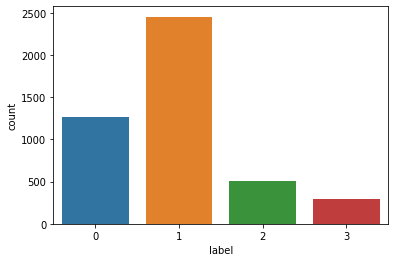

In [2]:
import seaborn
seaborn.countplot(x='label', data=dftotal)

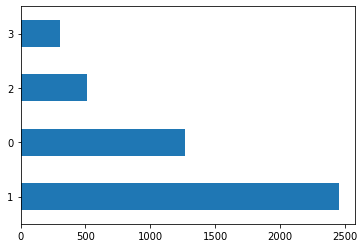

In [4]:
dftotal['label'].value_counts().plot(kind = 'barh')

## Classification Report

In [41]:
y_true = df['label'].tolist()
print(y_true)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 2, 0, 

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from sklearn.metrics import classification_report

y_true = df['label'].tolist()
y_pred = []

tokenizer = AutoTokenizer.from_pretrained("dibsondivya/ernie-phmtweets-sutd")
model = AutoModelForSequenceClassification.from_pretrained("dibsondivya/ernie-phmtweets-sutd")

tweetlist = df['tweet'].tolist()

# Tweet 
for tweet in tweetlist:
  print('tweet is ', tweet)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  inputs = tokenizer(tweet, padding=True, truncation=True, return_tensors="pt").to(device) # Move the tensor to the GPU
  outputs = model(**inputs)
  predictions = torch.argmax(outputs.logits, dim=-1)
  print('prediction is ', predictions.item())
  y_pred.append(predictions.item())

print(y_pred)

In [44]:
print(classification_report(y_true, y_pred, target_names=['0','1','2','3']))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       392
           1       0.93      0.92      0.92       737
           2       0.74      0.85      0.79       146
           3       0.66      0.85      0.74        86

    accuracy                           0.88      1361
   macro avg       0.82      0.87      0.84      1361
weighted avg       0.89      0.88      0.89      1361



## Failed Attempt to get model summary

In [7]:
!pip install transformers --quiet
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("dibsondivya/ernie-phmtweets-sutd")
model = AutoModelForSequenceClassification.from_pretrained("dibsondivya/ernie-phmtweets-sutd")
import torch
from torchsummary import summary

In [21]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(4, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-05, element

In [29]:
model.num_parameters()

109486852

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

summary(model, input_size=(3, 1361))

ValueError: ignored

In [27]:
summary(model.cuda(), (df_new.shape))

ValueError: ignored